In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Traffic Dataset.csv')
data

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2
...,...,...,...,...,...,...,...
1434,Friday,10-06-18,5,140,47,38,1
1435,Friday,10-06-18,5,141,15,8,4
1436,Friday,10-06-18,5,142,26,38,1
1437,Friday,10-06-18,5,143,16,34,3


In [ ]:
data.head(50)

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
0,Wednesday,01-06-18,3,2,35,17,2
1,Wednesday,01-06-18,3,3,36,16,3
2,Wednesday,01-06-18,3,4,27,25,5
3,Wednesday,01-06-18,3,5,23,23,3
4,Wednesday,01-06-18,3,6,18,42,2
5,Wednesday,01-06-18,3,7,11,14,2
6,Wednesday,01-06-18,3,8,45,28,4
7,Wednesday,01-06-18,3,9,39,18,5
8,Wednesday,01-06-18,3,10,25,9,4
9,Wednesday,01-06-18,3,11,39,7,5


In [ ]:
data.tail(10)

,Day,Date,CodedDay,Zone,Weather,Temperature,Traffic
1429,Friday,10-06-18,5,135,18,25,4
1430,Friday,10-06-18,5,136,31,8,2
1431,Friday,10-06-18,5,137,13,11,4
1432,Friday,10-06-18,5,138,34,15,1
1433,Friday,10-06-18,5,139,5,43,4
1434,Friday,10-06-18,5,140,47,38,1
1435,Friday,10-06-18,5,141,15,8,4
1436,Friday,10-06-18,5,142,26,38,1
1437,Friday,10-06-18,5,143,16,34,3
1438,Friday,10-06-18,5,144,16,17,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          1439 non-null   object
 1   Date         1439 non-null   object
 2   CodedDay     1439 non-null   int64 
 3   Zone         1439 non-null   int64 
 4   Weather      1439 non-null   int64 
 5   Temperature  1439 non-null   int64 
 6   Traffic      1439 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 78.8+ KB


In [ ]:
data.isnull().sum()


,0
Day,0
Date,0
CodedDay,0
Zone,0
Weather,0
Temperature,0
Traffic,0


In [ ]:
data.describe()

,CodedDay,Zone,Weather,Temperature,Traffic
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,4.000695,72.549687,23.886032,25.011119,3.031967
std,1.733054,41.554330,13.576787,11.325376,1.429018
min,1.000000,1.000000,0.000000,6.000000,1.000000
25%,3.000000,37.000000,12.000000,15.000000,2.000000
50%,4.000000,73.000000,24.000000,25.000000,3.000000
75%,5.000000,108.500000,35.000000,35.000000,4.000000
max,7.000000,144.000000,47.000000,45.000000,5.000000


In [ ]:
data.shape

(1439, 7)

In [ ]:
#features and target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
#define features and target variables
target = data['Traffic']
target

,Traffic
0,2
1,3
2,5
3,3
4,2
...,...
1434,1
1435,4
1436,1
1437,3


In [ ]:
features = data.drop('Traffic', axis=1)
features

,Day,Date,CodedDay,Zone,Weather,Temperature
0,Wednesday,01-06-18,3,2,35,17
1,Wednesday,01-06-18,3,3,36,16
2,Wednesday,01-06-18,3,4,27,25
3,Wednesday,01-06-18,3,5,23,23
4,Wednesday,01-06-18,3,6,18,42
...,...,...,...,...,...,...
1434,Friday,10-06-18,5,140,47,38
1435,Friday,10-06-18,5,141,15,8
1436,Friday,10-06-18,5,142,26,38
1437,Friday,10-06-18,5,143,16,34


In [ ]:
X= pd.get_dummies(data)
X

,CodedDay,Zone,Weather,Temperature,Traffic,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,...,Date_01-06-18,Date_02-06-18,Date_03-06-18,Date_04-06-18,Date_05-06-18,Date_06-06-18,Date_07-06-18,Date_08-06-18,Date_09-06-18,Date_10-06-18
0,3,2,35,17,2,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,3,3,36,16,3,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,4,27,25,5,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,3,5,23,23,3,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,3,6,18,42,2,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,5,140,47,38,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1435,5,141,15,8,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1436,5,142,26,38,1,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1437,5,143,16,34,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55)

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(600, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(110, activation='relu'),
    tf.keras.layers.Dense(1,)
])

In [ ]:

# Compile the model
model.compile(loss= tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics =['mae'])

In [ ]:

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=60,
                    validation_data=(X_test_scaled, y_test))

Epoch 1/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 3.9225 - mae: 1.3962 - val_loss: 0.1177 - val_mae: 0.2950
Epoch 2/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0536 - mae: 0.1839 - val_loss: 0.0089 - val_mae: 0.0739
Epoch 3/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0101 - mae: 0.0774 - val_loss: 0.0029 - val_mae: 0.0431
Epoch 4/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - mae: 0.0428 - val_loss: 0.0043 - val_mae: 0.0507
Epoch 5/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0025 - mae: 0.0389 - val_loss: 0.0018 - val_mae: 0.0323
Epoch 6/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0264 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 7/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2749e-04 - mae: 0.0194 - val_loss: 7.9924e-04 - val_mae: 0.0226
Epoch 8/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7110e-04 - mae: 0.0169 - val_loss: 5.8972e-04 - val_mae: 0.0199
Epoch 9/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

In [ ]:
# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0754e-04 - mae: 0.0177 
Test Loss: 0.0005
Test MAE: 0.0179


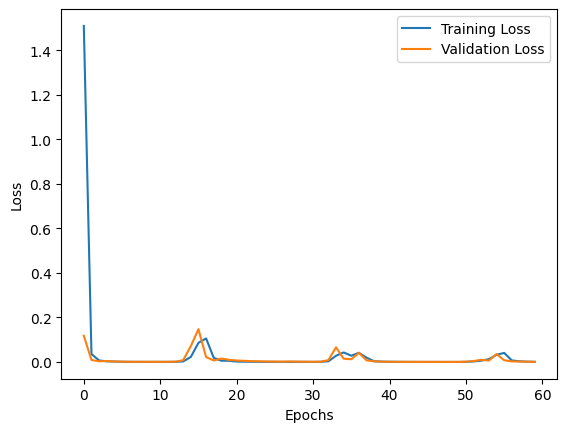

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#value counts
traffic_count=data['Traffic'].value_counts()
traffic_count


,count
Traffic,
5,312
2,294
1,280
3,277
4,276


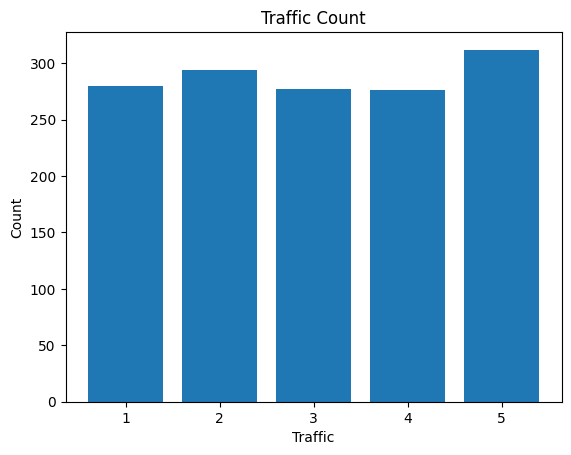

In [ ]:
#creating a bar graph
plt.bar(traffic_count.index, traffic_count.values)
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.title('Traffic Count')
plt.show()

